In [1]:
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn import datasets, linear_model, preprocessing, model_selection
import pickle
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D
from scipy import misc

Using TensorFlow backend.


In [2]:
#basic settings
nrow = 162
ncol = 506
rgb = 3

In [3]:
#get X, y, process missing(deleted) X
y_dir = 'y.txt'
ss_dir = 'screenshot'

y = np.array(pickle.load(open(y_dir, "rb")))
data_num = len(y)
#data_num = 1000#only use part of samples, applied only on local PC
y = y[:data_num]
X = np.zeros((data_num, nrow, ncol, rgb), dtype=np.uint8)#this gives float
#X = np.array([[[[np.uint8(0) for i in range(rgb)] for i in range(ncol)] for i in range(nrow)] for i in range(1)])


In [4]:
#import X from elsewhere, pick put those have lost

lost = []
for i in range(data_num):
    if i%100 == 0:
        print(i, 'image capture attempts')
    try:
        fn = './' + ss_dir + '/' + str(i).zfill(5) + '.bmp'
        #X = np.vstack((X, misc.imread(fn)[None, ]))
        X[i] = misc.imresize(misc.imread(fn), (nrow, ncol))#############################scipy.misc.imresize
    except:
        lost.append(i)

#X = np.delete(X, 0, axis=0)
X = np.delete(X, lost, axis=0)
y = np.delete(y, lost, axis=0)

0 image capture attempts


/home/jiadong_chen18/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/home/jiadong_chen18/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


100 image capture attempts
200 image capture attempts
300 image capture attempts
400 image capture attempts
500 image capture attempts
600 image capture attempts
700 image capture attempts
800 image capture attempts
900 image capture attempts
1000 image capture attempts
1100 image capture attempts
1200 image capture attempts
1300 image capture attempts
1400 image capture attempts
1500 image capture attempts
1600 image capture attempts
1700 image capture attempts
1800 image capture attempts
1900 image capture attempts
2000 image capture attempts
2100 image capture attempts
2200 image capture attempts
2300 image capture attempts
2400 image capture attempts
2500 image capture attempts
2600 image capture attempts
2700 image capture attempts
2800 image capture attempts
2900 image capture attempts
3000 image capture attempts
3100 image capture attempts
3200 image capture attempts
3300 image capture attempts
3400 image capture attempts
3500 image capture attempts
3600 image capture attempts
3

In [5]:
#np.vstack((X, X1))
#np.hstack((y, y1))
print(X.shape)
print(y.shape)

(13529, 162, 506, 3)
(13529, 2)


In [6]:
#y preprocess
y = np.array([[i[0], 0] for i in y])

In [7]:
#get train and test, shuffle X and y

from random import shuffle
stay = [i for i in range(len(y))]
shuffle(stay)
X = np.array([x for _,x in sorted(zip(stay, X))])
y = np.array([x for _,x in sorted(zip(stay, y))])


data_num = len(stay)
train_ratio = 0.999
train_num = int(data_num*train_ratio)
test_num = data_num - train_num

x_train = X[:train_num]
x_test = X[train_num:]
y_train = y[:train_num]
y_test = y[train_num:]


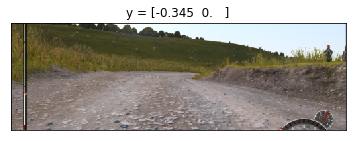

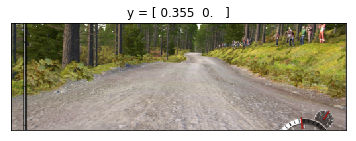

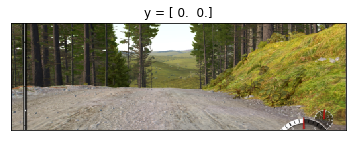

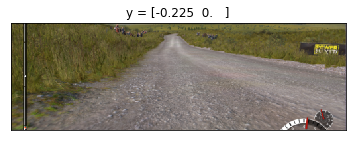

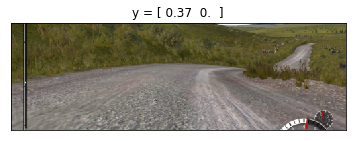

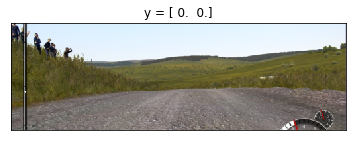

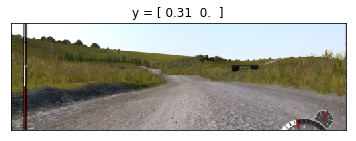

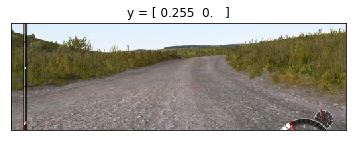

In [8]:
# Display the image
import matplotlib.pyplot as plt
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])
try:
    li
except:
    li = [i for i in range(len(X))]
shuffle(li)
for i in li[:8]:
    #plt.subplot(2, 4, i+1)
    disp_image(X[i])
    plt.title('y = %s' %y[i])
    plt.show()




In [9]:
#get model
def create_model(keep_prob = 0.8):
    model = Sequential()

    # NVIDIA's model
    model.add(Conv2D(24, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape= (nrow, ncol, 3)))
    model.add(Conv2D(36, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(48, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(1164, activation='relu'))
    drop_out = 1 - keep_prob
    model.add(Dropout(drop_out))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(1, activation='softsign'))

    return model

def vgg16(keep_prob = 0.8):
    model = Sequential()

    # vgg16 model
    model.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape= (nrow, ncol, 3)))
    model.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(256, kernel_size=(5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(1164, activation='relu'))
    drop_out = 1 - keep_prob
    model.add(Dropout(drop_out))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(1, activation='softsign'))

    return model



In [10]:
#model = vgg16()
model = create_model()
#from keras.models import load_model
#model = load_model('model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 79, 251, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 124, 36)       21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 60, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 58, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 56, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 46592)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1164)              54234252  
__________

In [11]:
#mae

y_mean = np.mean(y[:, 0])
worst_mae = np.mean(abs(y[:, 0] - y_mean))
print('worst mae:', worst_mae)

worst mae: 0.22529522822


In [12]:
#background
import keras.backend as K
K.clear_session()

# Call the fit function
epochs = 7
batch_size = 50

model = create_model()
model.compile(loss='mean_squared_error', metrics=['mean_absolute_error'], optimizer=optimizers.Adadelta())
model.fit(x_train, y_train[:, 0], batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=0.1)
#[:, 0]
model.save('model_20171216_dirt4.h5')



#X[:, :, :, None]for grey versionp



Train on 12163 samples, validate on 1352 samples
Epoch 1/7
12163/12163 [==============================] - 87s 7ms/step - loss: 0.1054 - mean_absolute_error: 0.2291 - val_loss: 0.0522 - val_mean_absolute_error: 0.1754
Epoch 2/7
12163/12163 [==============================] - 65s 5ms/step - loss: 0.0435 - mean_absolute_error: 0.1567 - val_loss: 0.0344 - val_mean_absolute_error: 0.1398
Epoch 3/7
12163/12163 [==============================] - 65s 5ms/step - loss: 0.0349 - mean_absolute_error: 0.1393 - val_loss: 0.0331 - val_mean_absolute_error: 0.1363
Epoch 4/7
12163/12163 [==============================] - 65s 5ms/step - loss: 0.0309 - mean_absolute_error: 0.1309 - val_loss: 0.0410 - val_mean_absolute_error: 0.1575
Epoch 5/7
12163/12163 [==============================] - 65s 5ms/step - loss: 0.0280 - mean_absolute_error: 0.1253 - val_loss: 0.0344 - val_mean_absolute_error: 0.1425
Epoch 6/7
12163/12163 [==============================] - 65s 5ms/step - loss: 0.0237 - mean_absolute_error: 0.1

In [13]:
#model.fit(X, y[:, 0], batch_size=batch_size, epochs=1, shuffle=True, validation_split=0.1)

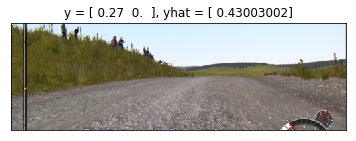

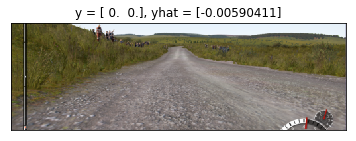

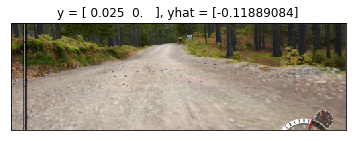

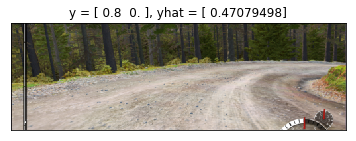

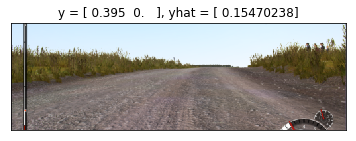

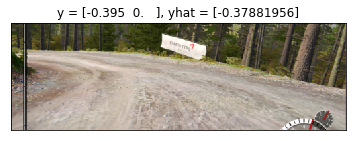

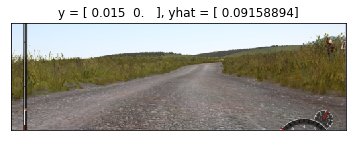

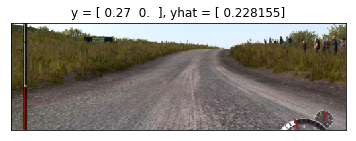

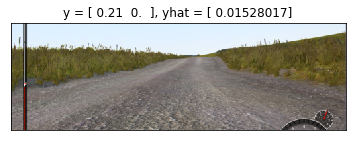

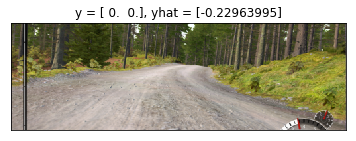

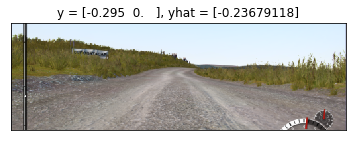

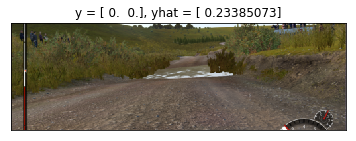

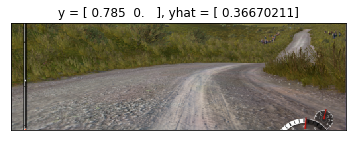

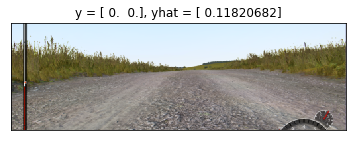

In [14]:
# Display the image with prediction result
import matplotlib.pyplot as plt
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

for i in range(test_num):
    #plt.subplot(2, 4, i+1)
    disp_image(x_test[i])
    yhat = model.predict(x_test[None, i])[0]
    plt.title('y = %s, yhat = %s' %(y_test[i], yhat))
    plt.show()